In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,Conv2D,MaxPool2D,BatchNormalization,AveragePooling2D
from tensorflow.keras.datasets import mnist

In [ ]:
print(tf.__version__)

2.0.0-rc0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [ ]:
print(x_train.shape)

(60000, 28, 28)


5


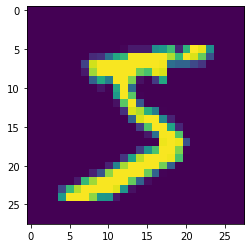

In [ ]:
plt.figure()
plt.imshow(x_train[0])
print(y_train[0])

In [ ]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000, 28, 28,1)
input_shape=x_train[0].shape

### CNN Architecture

* 4 Layer (16-32-64-128)
* 3x3 kernel
* Dropout
* Batch Normalization
* maxpool (2x2)


In [ ]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.30))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.30))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.30))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.30))

model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_11 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
batch_normalization_12 (Batc (None, 11, 11, 32)        128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 32)         

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,batch_size=128,epochs=10,verbose=1,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 53s 888us/sample - loss: 0.6683 - accuracy: 0.7849 - val_loss: 0.1293 - val_accuracy: 0.9612
Epoch 2/10
60000/60000 [==============================] - 53s 876us/sample - loss: 0.2370 - accuracy: 0.9279 - val_loss: 0.0878 - val_accuracy: 0.9735
Epoch 3/10
60000/60000 [==============================] - 52s 868us/sample - loss: 0.1796 - accuracy: 0.9445 - val_loss: 0.0739 - val_accuracy: 0.9768
Epoch 4/10
60000/60000 [==============================] - 52s 875us/sample - loss: 0.1544 - accuracy: 0.9527 - val_loss: 0.0622 - val_accuracy: 0.9803
Epoch 5/10
60000/60000 [==============================] - 53s 875us/sample - loss: 0.1370 - accuracy: 0.9580 - val_loss: 0.0583 - val_accuracy: 0.9827
Epoch 6/10
60000/60000 [==============================] - 54s 893us/sample - loss: 0.1225 - accuracy: 0.9621 - val_loss: 0.0516 - val_accuracy: 0.9848
Epoch 7/10
60000/60000 [====================

## LE-NET
* activiation='relu'
* optimizer='adam'

In [ ]:
model=Sequential()
model.add(Conv2D(filters=6,kernel_size=(5,5),activation='relu',input_shape=input_shape))
model.add(BatchNormalization())

model.add(Conv2D(filters=6,kernel_size=(5,5),strides=(2,2),activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters=16,kernel_size=(5,5),activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters=16,kernel_size=(5,5),strides=(2,2),activation='relu'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(120,activation='relu'))
model.add(Dense(84,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
batch_normalization_7 (Batch (None, 24, 24, 6)         24        
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 10, 10, 6)         906       
_________________________________________________________________
batch_normalization_8 (Batch (None, 10, 10, 6)         24        
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 6, 6, 16)          2416      
_________________________________________________________________
batch_normalization_9 (Batch (None, 6, 6, 16)          64        
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 1, 1, 16)         

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,batch_size=128,epochs=10,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 43s 717us/sample - loss: 0.3140 - accuracy: 0.9061 - val_loss: 0.0757 - val_accuracy: 0.9765
Epoch 2/10
60000/60000 [==============================] - 42s 703us/sample - loss: 0.0733 - accuracy: 0.9771 - val_loss: 0.0689 - val_accuracy: 0.9792
Epoch 3/10
60000/60000 [==============================] - 42s 707us/sample - loss: 0.0538 - accuracy: 0.9832 - val_loss: 0.0535 - val_accuracy: 0.9831
Epoch 4/10
60000/60000 [==============================] - 42s 706us/sample - loss: 0.0437 - accuracy: 0.9863 - val_loss: 0.0456 - val_accuracy: 0.9863
Epoch 5/10
60000/60000 [==============================] - 42s 705us/sample - loss: 0.0388 - accuracy: 0.9877 - val_loss: 0.0650 - val_accuracy: 0.9808
Epoch 6/10
60000/60000 [==============================] - 42s 697us/sample - loss: 0.0336 - accuracy: 0.9895 - val_loss: 0.0478 - val_accuracy: 0.9848
Epoch 7/10
60000/60000 [====================

## Alex Net using 2 layer+dense layers

In [ ]:
model=Sequential()

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dense(4096,activation='relu'))


model.add(Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,batch_size=128,epochs=10,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1052s 18ms/sample - loss: 4.1190 - accuracy: 0.9192 - val_loss: 0.0912 - val_accuracy: 0.9734
Epoch 2/10
60000/60000 [==============================] - 1087s 18ms/sample - loss: 0.0631 - accuracy: 0.9804 - val_loss: 0.0829 - val_accuracy: 0.9769
Epoch 3/10
60000/60000 [==============================] - 1091s 18ms/sample - loss: 0.0359 - accuracy: 0.9892 - val_loss: 0.0791 - val_accuracy: 0.9788
Epoch 4/10
60000/60000 [==============================] - 1090s 18ms/sample - loss: 0.0238 - accuracy: 0.9923 - val_loss: 0.1014 - val_accuracy: 0.9763
Epoch 5/10
60000/60000 [==============================] - 1071s 18ms/sample - loss: 0.0248 - accuracy: 0.9924 - val_loss: 0.0917 - val_accuracy: 0.9779
Epoch 6/10
60000/60000 [==============================] - 1076s 18ms/sample - loss: 0.0218 - accuracy: 0.9933 - val_loss: 0.0946 - val_accuracy: 0.9802
Epoch 7/10
60000/60000 [==============